In [1]:
import os
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import v2

import torch
import torch.nn as nn
import torch.optim as optim



# Import MNIST data
from torchvision import datasets, transforms
from torch.utils.data import DataLoader


from tqdm.notebook import tqdm




try : 
    Actual_Path = os.getcwd()
    os.chdir('./Modules')
    os.chdir('./Models')
    from resnet import *
    os.chdir('..')
    from preprocessing import *
    from train import *

    print('Modules Imported')
except:
    print('Error in importing Modules')
finally:
    os.chdir(Actual_Path)

Modules Imported


In [2]:
# Load the MNIST data

transform_mnist = transforms.Compose([
    transforms.ToTensor(),
    # Resize to 32x32
    transforms.Resize((32, 32)),
    transforms.Grayscale(num_output_channels=1),
    # Inverser les couleurs
    transforms.Lambda(lambda x: 1-x),
])

train_data , test_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform_mnist), datasets.MNIST(root='./data', train=False, download=True, transform=transform_mnist)

train_dataloader, test_dataloader = DataLoader(train_data, batch_size=32, shuffle=True), DataLoader(test_data, batch_size=32, shuffle=False)

In [3]:
# Data Augmentation

transform = v2.Compose([
    v2.RandomAffine(degrees=10, translate=(0.005, 0.005)),
    v2.GaussianBlur(kernel_size=3),
    v2.RandomRotation(degrees=40),
    v2.ToTensor(),
])


/home/ayoubchoukri/anaconda3/envs/Personal/lib/python3.12/site-packages/torchvision/transforms/v2/_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


In [4]:
def create_dataset_augmented(dataset, transform,nb_augmented=3):
    augmented_data = []

    ProgressBar = tqdm(total=len(dataset)*nb_augmented)
    for i in range(len(dataset)):
        for j in range(nb_augmented):
            augmented_data.append((transform(dataset[i][0]), dataset[i][1]))
            ProgressBar.update(1)
    ProgressBar.close()

    return augmented_data





train_data_augmented = create_dataset_augmented(train_data, transform)

train_dataloader_augmented = DataLoader(train_data_augmented, batch_size=32, shuffle=True)



  0%|          | 0/180000 [00:00<?, ?it/s]

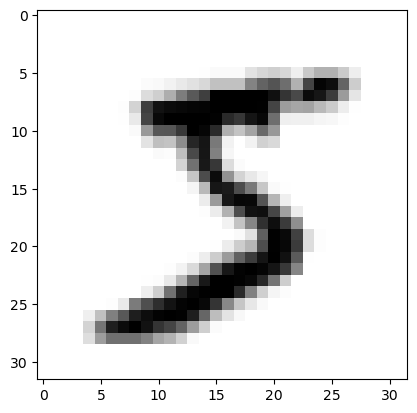

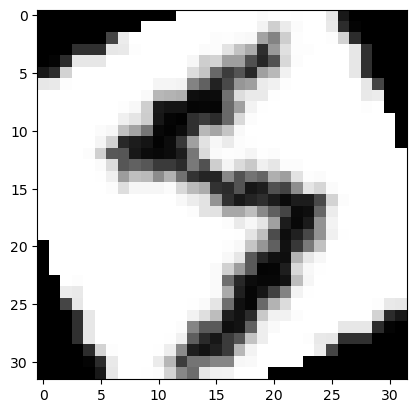

In [7]:
img_random = train_data[0][0]   

plt.imshow(img_random.squeeze(), cmap='gray')

plt.show()
img_random = transform(img_random)

plt.imshow(img_random.squeeze(), cmap='gray')

plt.show()

1.0 0.002619505


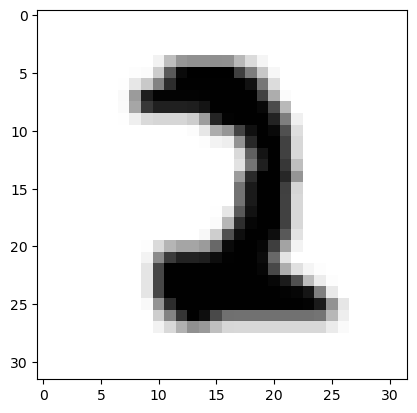

In [8]:
img = train_data[np.random.randint(0, len(train_data))][0].squeeze().numpy()
print(img.max(), img.min())
plt.imshow(img, cmap='gray')




# Resnet 18

In [10]:
device = 'cuda' if torch.cuda.is_available() else 'cpu' 
device

/home/ayoub-choukri/anaconda3/envs/Personal/lib/python3.12/site-packages/torch/cuda/__init__.py:118: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0


'cpu'

In [53]:
model = resnet18(in_channels=1, num_classes=10)


criterion = nn.CrossEntropyLoss()

optimizer = optim.Adam(model.parameters(), lr=0.001)

model, train_losses, test_losses, train_accuracies, test_accuracies = train_model(model, train_dataloader_augmented, test_dataloader, criterion, optimizer, num_epochs=10, device=device)

Epoch 1/10:   0%|          | 0/5625 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch [1/10], Train Loss: 0.1561, Train Accuracy: 95.30%, Test Loss: 0.0551, Test Accuracy: 98.56%


Epoch 2/10:   0%|          | 0/5625 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch [2/10], Train Loss: 0.0705, Train Accuracy: 97.95%, Test Loss: 0.0373, Test Accuracy: 98.97%


Epoch 3/10:   0%|          | 0/5625 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch [3/10], Train Loss: 0.0501, Train Accuracy: 98.52%, Test Loss: 0.0221, Test Accuracy: 99.31%


Epoch 4/10:   0%|          | 0/5625 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch [4/10], Train Loss: 0.0353, Train Accuracy: 98.91%, Test Loss: 0.0258, Test Accuracy: 99.16%


Epoch 5/10:   0%|          | 0/5625 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch [5/10], Train Loss: 0.0287, Train Accuracy: 99.13%, Test Loss: 0.0243, Test Accuracy: 99.25%


Epoch 6/10:   0%|          | 0/5625 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch [6/10], Train Loss: 0.0237, Train Accuracy: 99.28%, Test Loss: 0.0203, Test Accuracy: 99.43%


Epoch 7/10:   0%|          | 0/5625 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch [7/10], Train Loss: 0.0197, Train Accuracy: 99.38%, Test Loss: 0.0252, Test Accuracy: 99.36%


Epoch 8/10:   0%|          | 0/5625 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch [8/10], Train Loss: 0.0172, Train Accuracy: 99.47%, Test Loss: 0.0202, Test Accuracy: 99.45%


Epoch 9/10:   0%|          | 0/5625 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch [9/10], Train Loss: 0.0145, Train Accuracy: 99.54%, Test Loss: 0.0269, Test Accuracy: 99.38%


Epoch 10/10:   0%|          | 0/5625 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch [10/10], Train Loss: 0.0133, Train Accuracy: 99.58%, Test Loss: 0.0213, Test Accuracy: 99.41%


In [54]:
# Save the model

torch.save(model.state_dict(), 'resnet18_mnist.pth')



In [30]:
# Load the model

model = resnet18(in_channels=1, num_classes=10)

model.load_state_dict(torch.load('resnet18_mnist.pth',map_location=torch.device("cpu")))



<All keys matched successfully>

Predicted: 7


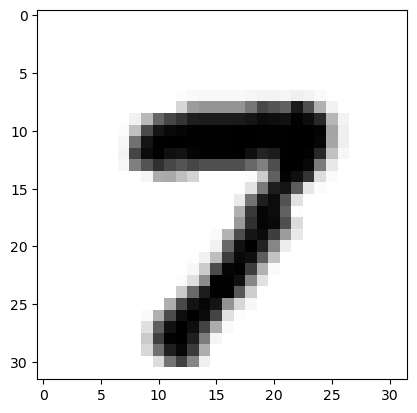

In [46]:
img_test = test_data[np.random.randint(0, len(test_data))][0].unsqueeze(0).to(device)   



model.eval()

with torch.no_grad():

    output = model(img_test.float())

    _, predicted = torch.max(output, 1)

    print(f"Predicted: {predicted.item()}")

    plt.imshow(img_test.squeeze().cpu().numpy(), cmap='gray')
    plt.show()



Predicted: 1


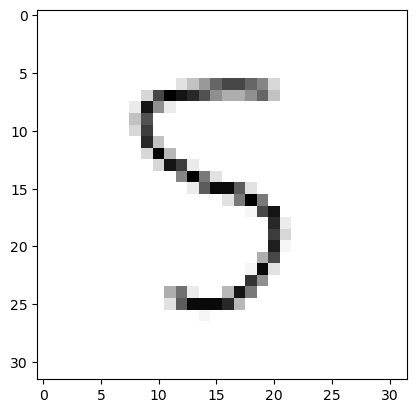

In [111]:
# Dessiner une image à la main

from PIL import Image

img = Image.open('drawing.png').convert('L')

# transform to 32x32
img = img.resize((32, 32))


img = v2.ToTensor()(img).unsqueeze(0).to(device)

model.eval()

with torch.no_grad():
    
    output = model(img.float())

    _, predicted = torch.max(output, 1)

    print(f"Predicted: {predicted.item()}")

    plt.imshow(img.squeeze().cpu().numpy(), cmap='gray')
    plt.show()


